# 📌 Importing important libraries

In [69]:
!pip install catboost --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.1 MB/s eta 0:00:00


In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings('ignore')


# 📌 Importing the data

In [78]:
df = pd.read_csv('shows.csv', on_bad_lines = 'skip', engine = 'python')
df.head()

,rank,show_id,title,year,link,imbd_votes,imbd_rating,certificate,duration,genre,...,director_id,director_name,writer_id,writer_name,storyline,user_id,user_name,review_id,review_title,review_content
0,1,tt5491994,Planet Earth II,2016,https://www.imdb.com/title/tt5491994,"145,597",9.5,TV-G,4h 58m,Documentary,...,"nm1565498,nm3482115,nm4830788,nm1769336,nm2139...","Justin Anderson,Ed Charles,Fredi Devas,Chadden...",nm2357454,Elizabeth White,David Attenborough returns with a new wildlife...,"ur0362356,ur33816519,ur64238818,ur69264448,ur2...","Wentloog,john-m-madsen,thespookybuz,pjdickinso...","rw3575992,rw3576144,rw3578121,rw3576211,rw3577...","At once awe-inspiring and terrifying!,Yet anot...",I have just finished watching the first episod...
1,2,tt0903747,Breaking Bad,2008,https://www.imdb.com/title/tt0903747,"1,881,190",9.5,TV-MA,49m,"Crime,Drama,Thriller",...,"nm0533713,nm0002835,nm0319213,nm0118778,nm0806...","Michelle MacLaren,Adam Bernstein,Vince Gilliga...","nm0319213,nm0332467,nm2297407,nm1028558,nm0909...","Vince Gilligan,Peter Gould,George Mastras,Sam ...",A chemistry teacher diagnosed with inoperable ...,"ur128165243,ur6387867,ur158768880,ur20552756,u...","FiRE010,Supermanfan-13,Lukasmj,TheLittleSongbi...","rw7088846,rw7530139,rw8672131,rw3856786,rw8725...","Really Great,Damn near perfect!,A show you nee...",I have never watched a show that is as consist...
2,3,tt0795176,Planet Earth,2006,https://www.imdb.com/title/tt0795176,"210,164",9.4,TV-PG,8h 58m,Documentary,...,"nm0288144,nm1768412","Alastair Fothergill,Mark Linfield","nm0041003,nm1761192,nm0288144,nm0662263","David Attenborough,Vanessa Berlowitz,Alastair ...",Each 50 minute episode features a global overv...,"ur4445210,ur1002035,ur4344459,ur14156906,ur141...","ccthemovieman-1,bob the moo,bs3dc,robert-kamer...","rw2002220,rw1356723,rw1574512,rw1594404,rw1723...","In A Word: Amazing,A visually impressive and m...","Thankfully, I caught a couple of these episode..."
3,4,tt0185906,Band of Brothers,2001,https://www.imdb.com/title/tt0185906,"469,081",9.4,TV-MA,9h 54m,"Drama,History,War",...,"nm0291205,nm0004121,nm0000158,nm0500896,nm0518...","David Frankel,Mikael Salomon,Tom Hanks,David L...","nm0024421,nm0096897,nm0296861,nm0000158,nm0420...","Stephen Ambrose,Erik Bork,E. Max Frye,Tom Hank...",The story of Easy Company of the U.S. Army 101...,"ur0312444,ur3922673,ur1019294,ur6387867,ur2467...","rbverhoef,philip_vanderveken,bsmith5552,Superm...","rw0626026,rw0626132,rw0625888,rw8123519,rw3248...","Excellent,This series is so unbelievably reali...",This week I saw three things based on WW-II no...
4,5,tt7366338,Chernobyl,2019,https://www.imdb.com/title/tt7366338,"751,884",9.4,TV-MA,5h 30m,"Drama,History,Thriller",...,nm0719307,Johan Renck,nm0563301,Craig Mazin,"In April 1986, an explosion at the Chernobyl n...","ur0482513,ur71468234,ur6387867,ur115536310,ur1...","Leofwine_draca,jfirebug,Supermanfan-13,DiCapri...","rw5285929,rw4875873,rw8325723,rw8574390,rw8521...","Exemplary,Incredible,Brilliant!,Must Watch!,Pa...",CHERNOBYL is an excellent depiction of the inf...


In [ ]:
'''
rank - Show Rank as per IMDB rating
show_id - Show ID
title - Name of the Show
year - Year of Show release
link - URL for the Show
imdb_votes - Number of people who voted for the IMDB rating
imdb_rating - Rating of the Show
certificate - Show Certification
duration - Duration of the Show
genre - Genre of the Show
cast_id - ID of the cast member who have worked on the Show
cast_name - Name of the cast member who have worked on the Show
director_id - ID of the director who have directed the Show
director_name - Name of the director who have directed the Show
writer_id - ID of the writer who have wrote script for the Show
writer_name - Name of the writer who have wrote script for the Show
storyline - Storyline of the Show
user_id - ID of the user who wrote review for the Show
user_name - Name of the user who wrote review for the Show
review_id - ID of the user review
review_title - Short review
review_content - Long review
'''

# 📌 Display basic structure

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            250 non-null    int64  
 1   show_id         250 non-null    object 
 2   title           250 non-null    object 
 3   year            250 non-null    int64  
 4   link            250 non-null    object 
 5   imbd_votes      250 non-null    object 
 6   imbd_rating     250 non-null    float64
 7   certificate     246 non-null    object 
 8   duration        249 non-null    object 
 9   genre           250 non-null    object 
 10  cast_id         250 non-null    object 
 11  cast_name       250 non-null    object 
 12  director_id     250 non-null    object 
 13  director_name   250 non-null    object 
 14  writer_id       250 non-null    object 
 15  writer_name     250 non-null    object 
 16  storyline       250 non-null    object 
 17  user_id         250 non-null    obj

In [ ]:
# Inference from the structure
# "imbd_votes" and "duration" should be in numeric data type

# 📌 Check if there are any null values in the data

In [80]:
null_value_tf=df.isnull().sum().any()
if(null_value_tf):
  print('There are null values in the data')
else:
  print('There are no null values in the data')

There are null values in the data


# 📌 Check for the columns with NULL values

In [81]:
df.isnull().sum()[df.isnull().sum() > 0]

,0
certificate,4
duration,1


# 📌 Finding the shape of the data

In [82]:
print('Shape :', df.shape)
print('Rows :', df.shape[0])
print('Columns :', df.shape[1])

Shape : (250, 22)
Rows : 250
Columns : 22


# 📌 Check for the duplicates in data

In [83]:
dup_value_tf=df.duplicated().sum()
if(dup_value_tf):
  print('There are duplicate values in the data')
else:
  print('No duplicate values in the data')

No duplicate values in the data


# 📌 Remove comma from imbd_votes and convert to number

In [84]:
df['imbd_votes'] = df['imbd_votes'].str.replace(',', '').astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            250 non-null    int64  
 1   show_id         250 non-null    object 
 2   title           250 non-null    object 
 3   year            250 non-null    int64  
 4   link            250 non-null    object 
 5   imbd_votes      250 non-null    int64  
 6   imbd_rating     250 non-null    float64
 7   certificate     246 non-null    object 
 8   duration        249 non-null    object 
 9   genre           250 non-null    object 
 10  cast_id         250 non-null    object 
 11  cast_name       250 non-null    object 
 12  director_id     250 non-null    object 
 13  director_name   250 non-null    object 
 14  writer_id       250 non-null    object 
 15  writer_name     250 non-null    object 
 16  storyline       250 non-null    object 
 17  user_id         250 non-null    obj

# 📌 Converting the duration column data from hours to minutes

In [85]:
def convert_duration(duration):
    if pd.isnull(duration):
      return None
    hours = 0
    minutes = 0
    if 'h' in duration:
      hours = int(duration.split('h')[0])
    if 'm' in duration:
      minutes = int(duration.split('m')[0].split('h')[-1])
    return hours * 60 + minutes

In [86]:
df['duration_minutes'] = df['duration'].apply(convert_duration)
df.head()

,rank,show_id,title,year,link,imbd_votes,imbd_rating,certificate,duration,genre,...,director_name,writer_id,writer_name,storyline,user_id,user_name,review_id,review_title,review_content,duration_minutes
0,1,tt5491994,Planet Earth II,2016,https://www.imdb.com/title/tt5491994,145597,9.5,TV-G,4h 58m,Documentary,...,"Justin Anderson,Ed Charles,Fredi Devas,Chadden...",nm2357454,Elizabeth White,David Attenborough returns with a new wildlife...,"ur0362356,ur33816519,ur64238818,ur69264448,ur2...","Wentloog,john-m-madsen,thespookybuz,pjdickinso...","rw3575992,rw3576144,rw3578121,rw3576211,rw3577...","At once awe-inspiring and terrifying!,Yet anot...",I have just finished watching the first episod...,298.0
1,2,tt0903747,Breaking Bad,2008,https://www.imdb.com/title/tt0903747,1881190,9.5,TV-MA,49m,"Crime,Drama,Thriller",...,"Michelle MacLaren,Adam Bernstein,Vince Gilliga...","nm0319213,nm0332467,nm2297407,nm1028558,nm0909...","Vince Gilligan,Peter Gould,George Mastras,Sam ...",A chemistry teacher diagnosed with inoperable ...,"ur128165243,ur6387867,ur158768880,ur20552756,u...","FiRE010,Supermanfan-13,Lukasmj,TheLittleSongbi...","rw7088846,rw7530139,rw8672131,rw3856786,rw8725...","Really Great,Damn near perfect!,A show you nee...",I have never watched a show that is as consist...,49.0
2,3,tt0795176,Planet Earth,2006,https://www.imdb.com/title/tt0795176,210164,9.4,TV-PG,8h 58m,Documentary,...,"Alastair Fothergill,Mark Linfield","nm0041003,nm1761192,nm0288144,nm0662263","David Attenborough,Vanessa Berlowitz,Alastair ...",Each 50 minute episode features a global overv...,"ur4445210,ur1002035,ur4344459,ur14156906,ur141...","ccthemovieman-1,bob the moo,bs3dc,robert-kamer...","rw2002220,rw1356723,rw1574512,rw1594404,rw1723...","In A Word: Amazing,A visually impressive and m...","Thankfully, I caught a couple of these episode...",538.0
3,4,tt0185906,Band of Brothers,2001,https://www.imdb.com/title/tt0185906,469081,9.4,TV-MA,9h 54m,"Drama,History,War",...,"David Frankel,Mikael Salomon,Tom Hanks,David L...","nm0024421,nm0096897,nm0296861,nm0000158,nm0420...","Stephen Ambrose,Erik Bork,E. Max Frye,Tom Hank...",The story of Easy Company of the U.S. Army 101...,"ur0312444,ur3922673,ur1019294,ur6387867,ur2467...","rbverhoef,philip_vanderveken,bsmith5552,Superm...","rw0626026,rw0626132,rw0625888,rw8123519,rw3248...","Excellent,This series is so unbelievably reali...",This week I saw three things based on WW-II no...,594.0
4,5,tt7366338,Chernobyl,2019,https://www.imdb.com/title/tt7366338,751884,9.4,TV-MA,5h 30m,"Drama,History,Thriller",...,Johan Renck,nm0563301,Craig Mazin,"In April 1986, an explosion at the Chernobyl n...","ur0482513,ur71468234,ur6387867,ur115536310,ur1...","Leofwine_draca,jfirebug,Supermanfan-13,DiCapri...","rw5285929,rw4875873,rw8325723,rw8574390,rw8521...","Exemplary,Incredible,Brilliant!,Must Watch!,Pa...",CHERNOBYL is an excellent depiction of the inf...,330.0


# 📌 Convert "genre" into multi-hot encoding

In [87]:
genre_dummies = df['genre'].str.get_dummies(sep = ',')
df = pd.concat([df, genre_dummies], axis = 1)

# 📌 Dropping irrelevant columns

In [88]:
df_cleaned = df.drop(columns = ['title', 'certificate', 'duration', 'genre'])
df_cleaned.head()

,rank,show_id,year,link,imbd_votes,imbd_rating,cast_id,cast_name,director_id,director_name,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,1,tt5491994,2016,https://www.imdb.com/title/tt5491994,145597,9.5,"nm0041003,nm1769336,nm0118096,nm2357454,nm4830...","David Attenborough,Chadden Hunter,Gordon Bucha...","nm1565498,nm3482115,nm4830788,nm1769336,nm2139...","Justin Anderson,Ed Charles,Fredi Devas,Chadden...",...,0,0,0,0,0,0,0,0,0,0
1,2,tt0903747,2008,https://www.imdb.com/title/tt0903747,1881190,9.5,"nm0186505,nm0348152,nm0666739,nm1336827,nm2666...","Bryan Cranston,Anna Gunn,Aaron Paul,Betsy Bran...","nm0533713,nm0002835,nm0319213,nm0118778,nm0806...","Michelle MacLaren,Adam Bernstein,Vince Gilliga...",...,0,0,0,0,0,0,0,1,0,0
2,3,tt0795176,2006,https://www.imdb.com/title/tt0795176,210164,9.4,"nm0000244,nm0041003,nm0238419,nm2898035,nm8603...","Sigourney Weaver,David Attenborough,Nikolay Dr...","nm0288144,nm1768412","Alastair Fothergill,Mark Linfield",...,0,0,0,0,0,0,0,0,0,0
3,4,tt0185906,2001,https://www.imdb.com/title/tt0185906,469081,9.4,"nm0342241,nm0507073,nm0515296,nm0853169,nm0005...","Scott Grimes,Damian Lewis,Ron Livingston,Shane...","nm0291205,nm0004121,nm0000158,nm0500896,nm0518...","David Frankel,Mikael Salomon,Tom Hanks,David L...",...,0,0,0,0,0,0,0,0,1,0
4,5,tt7366338,2019,https://www.imdb.com/title/tt7366338,751884,9.4,"nm2976580,nm0364813,nm0001745,nm1835523,nm0001...","Jessie Buckley,Jared Harris,Stellan Skarsgård,...",nm0719307,Johan Renck,...,0,0,0,0,0,0,0,1,0,0


# 📌 Check if there are still any null values in the data

In [89]:
null_value_tf=df_cleaned.isnull().sum().any()
if(null_value_tf):
  print('There are null values in the data')
else:
  print('There are no null values in the data')

There are null values in the data


# 📌 Check for the column with null values in the data

In [90]:
df_cleaned.isnull().sum()[df_cleaned.isnull().sum() > 0]

,0
duration_minutes,1


# 📌 Drop the rows with NULL values

In [91]:
df_cleaned = df_cleaned.dropna()
null_value_tf=df_cleaned.isnull().sum().any()
if(null_value_tf):
  print('There are null values in the data')
else:
  print('There are no null values in the data')

There are no null values in the data


# 📌 Correlation Analysis

In [92]:
correlation_matrix = df_cleaned.corr(numeric_only = True)
correlation_matrix['imbd_rating'].sort_values(ascending = False)

,imbd_rating
imbd_rating,1.000000
duration_minutes,0.341432
Documentary,0.305172
imbd_votes,0.252455
History,0.195772
War,0.182622
Family,0.139162
Fantasy,0.069693
Thriller,0.065666
News,0.036371


# 📌 Vizualization of Votes vs IMDB Ratings

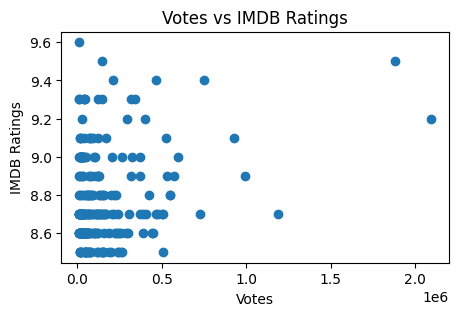

In [93]:
plt.figure(figsize = (5, 3))
plt.scatter(df_cleaned['imbd_votes'], df_cleaned['imbd_rating'])
plt.title('Votes vs IMDB Ratings')
plt.xlabel('Votes')
plt.ylabel('IMDB Ratings')
plt.show()

In [ ]:
# Inference from the above plot
# We could not find any specific pattern

# 📌 Vizualization of IMBD Rating vs duration(minutes)

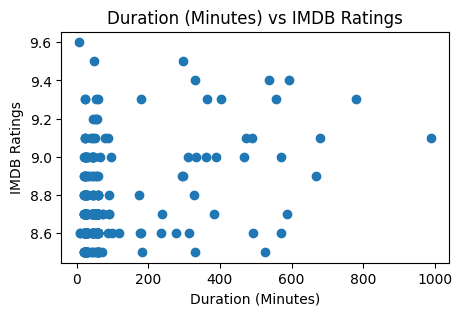

In [94]:
plt.figure(figsize = (5, 3))
plt.scatter(df_cleaned['duration_minutes'], df_cleaned['imbd_rating'])
plt.title('Duration (Minutes) vs IMDB Ratings')
plt.xlabel('Duration (Minutes)')
plt.ylabel('IMDB Ratings')
plt.show()

In [ ]:
# Inference from the above plot
# We could not find any specific pattern

# 📌 Distribution Plot visualization for imbd_ratings

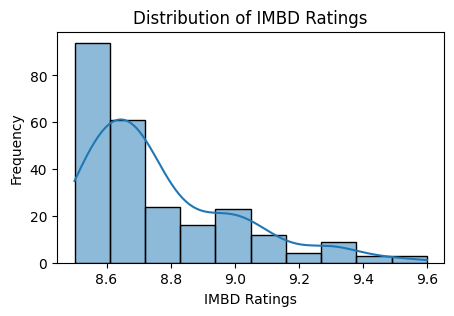

In [95]:
plt.figure(figsize = (5, 3))
sns.histplot(df_cleaned['imbd_rating'], bins = 10, kde = True)
plt.title('Distribution of IMBD Ratings')
plt.xlabel('IMBD Ratings')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Inference from the above plot
# Peak of plot shows near 8.6 rating and
# then count of movies is exponentially decreasing.

# 📌 Calculate Average IMBD Rating by Genre

In [96]:
genre_columns = genre_dummies.columns
genre_counts = df_cleaned[genre_columns].sum().sort_values(ascending = False).head(10)
avg_ratings = {genre : df_cleaned[df_cleaned[genre] == 1]['imbd_rating'].mean() for genre in genre_counts.index}

for genre, rating in avg_ratings.items():
  print(f'Average IMDB Rating for {genre} : {round(rating, 1)}')

Average IMDB Rating for Drama : 8.8
Average IMDB Rating for Comedy : 8.7
Average IMDB Rating for Action : 8.7
Average IMDB Rating for Adventure : 8.8
Average IMDB Rating for Crime : 8.7
Average IMDB Rating for Animation : 8.8
Average IMDB Rating for Documentary : 9.0
Average IMDB Rating for Mystery : 8.7
Average IMDB Rating for Thriller : 8.8
Average IMDB Rating for History : 8.9


# 📌 Vizualization of Average IMBD Rating by Genre

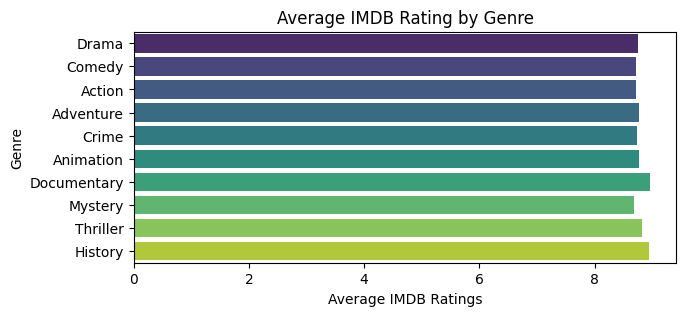

In [97]:
plt.figure(figsize = (7, 3))
sns.barplot(x = list(avg_ratings.values()), y = list(avg_ratings.keys()), palette = 'viridis')
plt.title('Average IMDB Rating by Genre')
plt.xlabel('Average IMDB Ratings')
plt.ylabel('Genre')
plt.show()

# 📌 Feature Engineering

In [ ]:
'''
Categorize the movies
1990 - 2000 : 1990s
2000 - 2010 : 2000s
2010 - 2020 : 2010s
2020 - 2025 : 2020s
2026 onwards : Other
'''

# 📌 Creating the function to categorize the movie

In [98]:
def categorize_year(year):
  if 1990 <= year <= 2000:
    return '1990s'
  elif 2000 <= year <= 2010:
    return '2000s'
  elif 2010 <= year <= 2020:
    return '2010s'
  elif 2020 <= year <= 2025:
    return '2020s'
  else:
    return 'Other'

# 📌 Creating a new column with name 'year_range'

In [99]:
df_cleaned['year_range'] = df_cleaned['year'].apply(categorize_year)
df_cleaned.head()

,rank,show_id,year,link,imbd_votes,imbd_rating,cast_id,cast_name,director_id,director_name,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,year_range
0,1,tt5491994,2016,https://www.imdb.com/title/tt5491994,145597,9.5,"nm0041003,nm1769336,nm0118096,nm2357454,nm4830...","David Attenborough,Chadden Hunter,Gordon Bucha...","nm1565498,nm3482115,nm4830788,nm1769336,nm2139...","Justin Anderson,Ed Charles,Fredi Devas,Chadden...",...,0,0,0,0,0,0,0,0,0,2010s
1,2,tt0903747,2008,https://www.imdb.com/title/tt0903747,1881190,9.5,"nm0186505,nm0348152,nm0666739,nm1336827,nm2666...","Bryan Cranston,Anna Gunn,Aaron Paul,Betsy Bran...","nm0533713,nm0002835,nm0319213,nm0118778,nm0806...","Michelle MacLaren,Adam Bernstein,Vince Gilliga...",...,0,0,0,0,0,0,1,0,0,2000s
2,3,tt0795176,2006,https://www.imdb.com/title/tt0795176,210164,9.4,"nm0000244,nm0041003,nm0238419,nm2898035,nm8603...","Sigourney Weaver,David Attenborough,Nikolay Dr...","nm0288144,nm1768412","Alastair Fothergill,Mark Linfield",...,0,0,0,0,0,0,0,0,0,2000s
3,4,tt0185906,2001,https://www.imdb.com/title/tt0185906,469081,9.4,"nm0342241,nm0507073,nm0515296,nm0853169,nm0005...","Scott Grimes,Damian Lewis,Ron Livingston,Shane...","nm0291205,nm0004121,nm0000158,nm0500896,nm0518...","David Frankel,Mikael Salomon,Tom Hanks,David L...",...,0,0,0,0,0,0,0,1,0,2000s
4,5,tt7366338,2019,https://www.imdb.com/title/tt7366338,751884,9.4,"nm2976580,nm0364813,nm0001745,nm1835523,nm0001...","Jessie Buckley,Jared Harris,Stellan Skarsgård,...",nm0719307,Johan Renck,...,0,0,0,0,0,0,1,0,0,2010s


# 📌 One Hot Encode the "year_range"

In [100]:
year_range_dummies = pd.get_dummies(df_cleaned['year_range'], prefix = 'year')
year_range_dummies = year_range_dummies.replace({False : 0, True : 1})
df_cleaned = pd.concat([df_cleaned, year_range_dummies], axis = 1)
df_cleaned.head()

,rank,show_id,year,link,imbd_votes,imbd_rating,cast_id,cast_name,director_id,director_name,...,Talk-Show,Thriller,War,Western,year_range,year_1990s,year_2000s,year_2010s,year_2020s,year_Other
0,1,tt5491994,2016,https://www.imdb.com/title/tt5491994,145597,9.5,"nm0041003,nm1769336,nm0118096,nm2357454,nm4830...","David Attenborough,Chadden Hunter,Gordon Bucha...","nm1565498,nm3482115,nm4830788,nm1769336,nm2139...","Justin Anderson,Ed Charles,Fredi Devas,Chadden...",...,0,0,0,0,2010s,0,0,1,0,0
1,2,tt0903747,2008,https://www.imdb.com/title/tt0903747,1881190,9.5,"nm0186505,nm0348152,nm0666739,nm1336827,nm2666...","Bryan Cranston,Anna Gunn,Aaron Paul,Betsy Bran...","nm0533713,nm0002835,nm0319213,nm0118778,nm0806...","Michelle MacLaren,Adam Bernstein,Vince Gilliga...",...,0,1,0,0,2000s,0,1,0,0,0
2,3,tt0795176,2006,https://www.imdb.com/title/tt0795176,210164,9.4,"nm0000244,nm0041003,nm0238419,nm2898035,nm8603...","Sigourney Weaver,David Attenborough,Nikolay Dr...","nm0288144,nm1768412","Alastair Fothergill,Mark Linfield",...,0,0,0,0,2000s,0,1,0,0,0
3,4,tt0185906,2001,https://www.imdb.com/title/tt0185906,469081,9.4,"nm0342241,nm0507073,nm0515296,nm0853169,nm0005...","Scott Grimes,Damian Lewis,Ron Livingston,Shane...","nm0291205,nm0004121,nm0000158,nm0500896,nm0518...","David Frankel,Mikael Salomon,Tom Hanks,David L...",...,0,0,1,0,2000s,0,1,0,0,0
4,5,tt7366338,2019,https://www.imdb.com/title/tt7366338,751884,9.4,"nm2976580,nm0364813,nm0001745,nm1835523,nm0001...","Jessie Buckley,Jared Harris,Stellan Skarsgård,...",nm0719307,Johan Renck,...,0,1,0,0,2010s,0,0,1,0,0


# 📌 Drop the irrelevant features

In [101]:
df_cleaned = df_cleaned.drop(columns = ['year', 'year_range'])
df_cleaned.head()

,rank,show_id,link,imbd_votes,imbd_rating,cast_id,cast_name,director_id,director_name,writer_id,...,Sport,Talk-Show,Thriller,War,Western,year_1990s,year_2000s,year_2010s,year_2020s,year_Other
0,1,tt5491994,https://www.imdb.com/title/tt5491994,145597,9.5,"nm0041003,nm1769336,nm0118096,nm2357454,nm4830...","David Attenborough,Chadden Hunter,Gordon Bucha...","nm1565498,nm3482115,nm4830788,nm1769336,nm2139...","Justin Anderson,Ed Charles,Fredi Devas,Chadden...",nm2357454,...,0,0,0,0,0,0,0,1,0,0
1,2,tt0903747,https://www.imdb.com/title/tt0903747,1881190,9.5,"nm0186505,nm0348152,nm0666739,nm1336827,nm2666...","Bryan Cranston,Anna Gunn,Aaron Paul,Betsy Bran...","nm0533713,nm0002835,nm0319213,nm0118778,nm0806...","Michelle MacLaren,Adam Bernstein,Vince Gilliga...","nm0319213,nm0332467,nm2297407,nm1028558,nm0909...",...,0,0,1,0,0,0,1,0,0,0
2,3,tt0795176,https://www.imdb.com/title/tt0795176,210164,9.4,"nm0000244,nm0041003,nm0238419,nm2898035,nm8603...","Sigourney Weaver,David Attenborough,Nikolay Dr...","nm0288144,nm1768412","Alastair Fothergill,Mark Linfield","nm0041003,nm1761192,nm0288144,nm0662263",...,0,0,0,0,0,0,1,0,0,0
3,4,tt0185906,https://www.imdb.com/title/tt0185906,469081,9.4,"nm0342241,nm0507073,nm0515296,nm0853169,nm0005...","Scott Grimes,Damian Lewis,Ron Livingston,Shane...","nm0291205,nm0004121,nm0000158,nm0500896,nm0518...","David Frankel,Mikael Salomon,Tom Hanks,David L...","nm0024421,nm0096897,nm0296861,nm0000158,nm0420...",...,0,0,0,1,0,0,1,0,0,0
4,5,tt7366338,https://www.imdb.com/title/tt7366338,751884,9.4,"nm2976580,nm0364813,nm0001745,nm1835523,nm0001...","Jessie Buckley,Jared Harris,Stellan Skarsgård,...",nm0719307,Johan Renck,nm0563301,...,0,0,1,0,0,0,0,1,0,0


# 📌 Model Building

In [183]:
# Dropping non-numeric columns(categorical)
X = df_cleaned.drop(columns=['imbd_rating', 'link', 'show_id', 'cast_id', 'director_id', 'writer_id', 'user_id', 'review_id'])
y = df_cleaned['imbd_rating']

cat_features = X.select_dtypes(include=['object']).columns.tolist()

# Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

cb_model = CatBoostRegressor(
    iterations=500,
    depth=1,
    learning_rate=1,
    cat_features=cat_features,
    verbose=50
)
cb_model.fit(X_train, y_train)
cb_pred = cb_model.predict(X_test)



0:	learn: 0.1517156	total: 670us	remaining: 334ms
50:	learn: 0.0646497	total: 13.7ms	remaining: 121ms
100:	learn: 0.0531804	total: 24.7ms	remaining: 97.8ms
150:	learn: 0.0482405	total: 35.8ms	remaining: 82.8ms
200:	learn: 0.0448798	total: 47.3ms	remaining: 70.3ms
250:	learn: 0.0420224	total: 58.4ms	remaining: 58ms
300:	learn: 0.0398834	total: 69.5ms	remaining: 45.9ms
350:	learn: 0.0380561	total: 80.8ms	remaining: 34.3ms
400:	learn: 0.0364875	total: 120ms	remaining: 29.6ms
450:	learn: 0.0351102	total: 131ms	remaining: 14.3ms
499:	learn: 0.0337588	total: 144ms	remaining: 0us


#  📌 Performing train test split

In [186]:
X = df_cleaned.drop(columns = ['imbd_rating'])
y = df_cleaned['imbd_rating']

# Performing train test split
Xx_train, X_test, yy_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [187]:
scaler = StandardScaler()
numeric_cols = ['imbd_votes', 'duration_minutes', 'rank']

Xx_train[numeric_cols] = scaler.fit_transform(Xx_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [188]:
# Dropping non-numeric columns and include only number
Xx_train = Xx_train.select_dtypes(include = ['number'])
X_test = X_test.select_dtypes(include = ['number'])

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()

# Training the models
lr_model.fit(Xx_train, yy_train)
rf_model.fit(Xx_train, yy_train)
gb_model.fit(Xx_train, yy_train)

# Taking predictions from the model on testing data
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

# 📌 Compute Metrics

In [189]:
def evaluate_model(y_true, y_pred, model_name):
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)
  return {
      'Model' : model_name,
      'MSE' : mse,
      'RMSE' : rmse,
      'R2 Score' : r2
  }

# 📌 Evaluation of the models

In [190]:
results = [
    evaluate_model(y_test, lr_pred, 'Linear Regression'),
    evaluate_model(y_test, rf_pred, 'Random Forest'),
    evaluate_model(y_test, gb_pred, 'Gradient Boosting'),
    evaluate_model(y_test, cb_pred, 'Cat Boost')
]

results_df = pd.DataFrame(results)
results_df.head()

,Model,MSE,RMSE,R2 Score
0,Linear Regression,0.028223,0.167997,0.535804
1,Random Forest,0.020975,0.144827,0.655020
2,Gradient Boosting,0.017960,0.134016,0.704600
3,Cat Boost,0.015309,0.123729,0.748210


In [ ]:
# Inference from the above is Cat Boost followed by Gradient Boosting are the best model

# 📌 Residuals plot for model GradientBoosting and CatBoosting

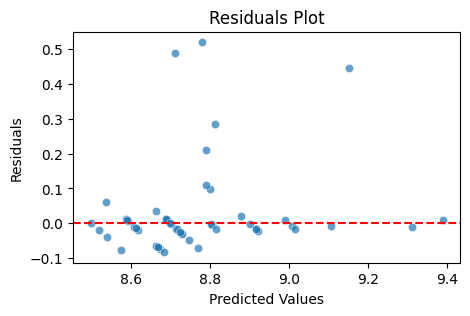

In [181]:
# GradientBoosting
residuals = y_test - gb_pred
plt.figure(figsize = (5, 3))
sns.scatterplot(x = gb_pred, y = residuals, alpha = 0.7)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

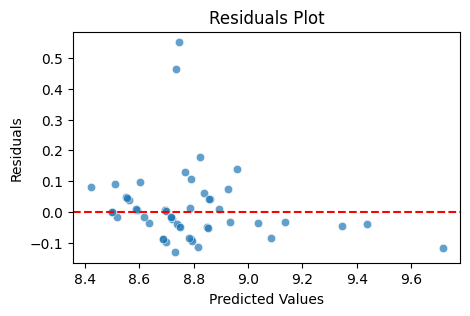

In [173]:
# CatBoost
residuals = y_test - cb_pred
plt.figure(figsize = (5, 3))
sns.scatterplot(x = cb_pred, y = residuals, alpha = 0.7)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# 📌 Grid Search CV for Catboost

In [193]:
# Catboost
# Parameters Grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.03, 0.1, 0.2],
    'depth': [4, 6, 8]
}

# Initializing Grid Search
grid_search = GridSearchCV(estimator = CatBoostRegressor(cat_features=cat_features,verbose=0),
                           param_grid = param_grid, cv = 5,
                           scoring = 'r2', n_jobs = -1)

# Fitting the data
grid_search.fit(X_train, y_train)

# Best Parameters
best_params = grid_search.best_params_
print(best_params)

{'depth': 6, 'learning_rate': 0.1, 'n_estimators': 500}


# 📌 Creating the optimal model

In [209]:
best_model = grid_search.best_estimator_
y_pred_best = grid_search.best_score_
print('Best Parameters :', grid_search.best_params_)
print('Best Score (r2) :', round(y_pred_best, 2))

Best Parameters : {'depth': 6, 'learning_rate': 0.1, 'n_estimators': 500}
Best Score (r2) : 0.84


# 📌 Model Interpretation

In [218]:
# Extract the feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

top_features = feature_importance_df.nlargest(10, 'Importance')

# Print the top 10 important features
print(top_features)


             Feature  Importance
0               rank   69.592020
1         imbd_votes   11.913678
9   duration_minutes    5.096707
38        year_2010s    2.225560
18            Family    1.874409
39        year_2020s    1.120603
17             Drama    1.003835
14            Comedy    0.960711
16       Documentary    0.671506
12         Animation    0.668399


# 📌 Visualization of the top 10 important features

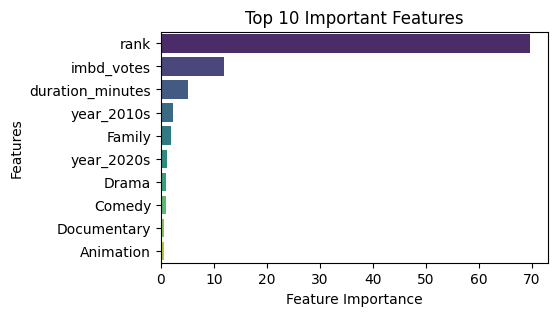

In [220]:
plt.figure(figsize = (5, 3))
sns.barplot(x = 'Importance', y = 'Feature', data = top_features, palette = 'viridis')
plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()